In [1]:
import struct
import sys
from matplotlib import pyplot as plt
from matplotlib.widgets import Button
from shapely import geometry
import numpy as np
from matplotlib.widgets import Slider
from matplotlib.widgets import TextBox
import pandas as pd

In [ ]:
dir = sys.argv[1]

print("Dir {}".format(dir))

def slider_on_change(val):
   if dir == "1":
      l1.set_xdata(xfilt[0:int(val)])
      l1.set_ydata(yfilt[0:int(val)])
   elif dir == "-1":
      l1.set_xdata(xfilt[int(val):-1])
      l1.set_ydata(yfilt[int(val):-1])
   if dir == "0":
      l2.set_xdata(newx[int(val):(int(val)+10000)])
      l2.set_ydata(newy[int(val):(int(val)+10000)])

   print(int(val))
   fig.canvas.draw_idle()   
     
vidfile = './RawData/VT1.Nvt'
#testFile = './rec_09152017/VT1.Nvt'
with open(vidfile, 'rb') as f:
    videodata = f.read()[16384:]
    f.close() 
x, y, ts,_, _  = getVideoData(videodata)

xfilt = vu.smooth(x, window_len=200)
yfilt = vu.smooth(y, window_len=200)

#plot min and max values
xmin = np.amin(xfilt)
xmax = np.amax(xfilt)
ymin = np.amin(yfilt)
ymax = np.amax(yfilt)

ylim=100
xfilt,yfilt = vu.mask(xfilt,yfilt,0, ylim)

fig, ax = plt.subplots()

l1, = plt.plot(xfilt,yfilt,'.', markersize=5, color='#FFE4C4')

if dir == "0":
    l2, = plt.plot(newx[1:1000],newy[1:1000],'.', markersize=5, color='#0F0F0F')

#l1, = plt.plot(xfilt, yfilt, '.', markersize=5, color='#FFE4C4')

#plt.xlim([40000,np.amax(xfilt)+1000])
plt.xlim([xmin-1000, xmax+1000])
plt.ylim([ymin-1000, ymax+1000])

tslider_ax = fig.add_axes([0.25, 0.15, 0.65, 0.03])
tslider = Slider(tslider_ax, 'Time', 0.1, len(xfilt), valinit=0.1)
tslider.on_changed(slider_on_change)

#cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

In [13]:
import numpy as np
import struct

def getTrackerXY_points(data):
    recsize = 1828
    nrecs = len(data)//recsize
    xloc = np.zeros(nrecs)
    yloc = np.zeros(nrecs)
    hdir = np.zeros(nrecs)
    ts = np.zeros(nrecs)
    
    for i in range(nrecs):
        recoffset=recsize*i
        xloc[i] = struct.unpack('i', data[recoffset+1615:recoffset+1619])[0]
        yloc[i] = struct.unpack('i', data[recoffset+1619:recoffset+1623])[0]
        ts[i] = struct.unpack('q', data[recoffset+6:recoffset+14])[0]
        
    return xloc, yloc, ts
vidfile = './VT1.Nvt'
with open(vidfile, 'rb') as f:
   data = f.read()[16384:]
f.close()

x,y,ts = getVideo(data)

In [18]:
from matplotlib import pyplot as plt
print(x[100000:200000], y[100000:200000])

(array([15259., 14987., 14377., ..., 17656., 17241., 17625.]), array([85504., 86272., 86272., ..., 96768., 97280., 96768.]))


In [17]:
print(len(x))

298398


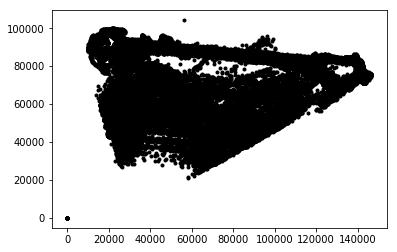

In [19]:
plt.plot(x[100000:200000],y[100000:200000], 'k.')
plt.show()

(array([ 54., 184.,  57., 152., 249., 219.,  73., 124., 157.,  45.,  13.,
       156., 255.,  63., 210., 192.,  80., 179.,  96., 160., 230.,  54.,
       102., 100.,  21., 212., 201., 152.,  24.,  40.,  72., 139., 156.,
        31., 173.,  13., 223.,  79., 193., 194.,  48.,  35., 211., 162.,
       165., 116., 196.,   7., 150., 134., 185., 184., 249., 200.,  88.,
        74., 168.,  31.,  92., 204.,  31.,  29., 108., 163., 194., 193.,
       178.,  50.,  33., 164.,  68., 183.,  55., 135.,   4., 249.,   9.,
       106., 153., 104., 153.,  13.,  94., 126.,  31.,  60., 252.,  99.,
        83.,  33., 115.,  96., 112.,  68.,  38.,  23.,  85., 166.,   5.,
        20.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 

In [2]:
import numpy as np
import struct

def getVideoData(fname):
  print(fname)

  with open(fname, 'rb') as f:
    data = f.read()[16384:]
    f.close()
  
  nrecords = int(len(data)/1828)
  print("Number of Records: {}".format(nrecords))
  #nrecs=3000
  xloc=np.zeros(nrecords, dtype=np.uint8)
  yloc=np.zeros(nrecords, dtype=np.uint8)
  hdir=np.zeros(nrecords, dtype=np.uint8)
  ts= np.zeros(nrecords, dtype=np.uint64)
 # dwPoints = np.zeros([nrecords,400])
  dwPoints = []
  dnTargets = []
  recsize=1828
        
  for record in range(nrecords):
    # print(record)
     recoffset = recsize*record
     swstx = int(struct.unpack('H',data[recoffset:recoffset+2])[0])
#     print("swstx: {}".format(swstx))
     swid = int(struct.unpack('H',data[recoffset+2:recoffset+4])[0])
#     print("swid: {}".format(swid))
     swdata_size = int(struct.unpack('H',data[recoffset+4:recoffset+6])[0])
#     print("swdata_size: {}".format(swdata_size)) 
     ts[record] = int(struct.unpack('Q',data[recoffset+6:recoffset+14])[0])
     dwP = struct.unpack('400I',data[recoffset+14:recoffset+1614])
#     print(len(dwP)
     dwPoints.append(tuple(p for p in dwP if int(p) != 0))
#     sncrc = int(struct.unpack('H', data[recoffset+1614:recoffset+1616])[0])

     xloc[record] = struct.unpack('i', data[recoffset+1615:recoffset+1619])[0]
     yloc[record] = struct.unpack('i', data[recoffset+1619:recoffset+1623])[0]
  
     dnT = struct.unpack('50i',data[recoffset+1628:recoffset+1828])
     #newone = struct.unpack('H', data[recoffset+1828:recoffset+1830])[0]
     #print("new one {}".format(newone))

     dnTargets.append(tuple(t for t in dnT if int(t) != 0))
  return ts, xloc, yloc, dwPoints, dnTargets
 

In [12]:
from __future__ import division

import struct
import matplotlib.pyplot as plt
import numpy as np
import os
import array
import sys
       
def getVideodata(fname):
    
  with open(fname, 'rb') as f:
    data = f.read()[16384:]
    f.close()
  print("data: ", len(data))  
  nrecords = len(data)//1828
  print("Number of Records: {}".format(nrecords))
  #nrecs=3000
  xloc=np.zeros(nrecords, dtype=np.uint8)
  yloc=np.zeros(nrecords, dtype=np.uint8)
  hdir=np.zeros(nrecords, dtype=np.uint8)
  ts= np.zeros(nrecords, dtype=np.uint64)
 # dwPoints = np.zeros([nrecords,400])
  dwPoints = []
  dnTargets = []
  recsize=1828
  
  for record in range(nrecords):
    # print(record)
     recoffset = recsize*record
     swstx = int(struct.unpack('H',data[recoffset:recoffset+2])[0])
#     print("swstx: {}".format(swstx))
     swid = int(struct.unpack('H',data[recoffset+2:recoffset+4])[0])
#     print("swid: {}".format(swid))
     swdata_size = int(struct.unpack('H',data[recoffset+4:recoffset+6])[0])
#     print("swdata_size: {}".format(swdata_size)) 
     ts[record] = int(struct.unpack('Q',data[recoffset+6:recoffset+14])[0])
     dwP = struct.unpack('400I',data[recoffset+14:recoffset+1614])
#     print(len(dwP)
     dwPoints.append(tuple(p for p in dwP if int(p) != 0))
     sncrc = int(struct.unpack('H', data[recoffset+1614:recoffset+1616])[0])
     #xloc[record] = struct.unpack('i', data[recoffset+1615:recoffset+1619])[0]
     #yloc[record] = struct.unpack('i', data[recoffset+1619:recoffset+1623])[0]
     xloc[record] = int(struct.unpack('i', data[recoffset+1616:recoffset+1620])[0])
     yloc[record] = int(struct.unpack('i', data[recoffset+1620:recoffset+1624])[0])
     hdir[record] = int(struct.unpack('i', data[recoffset+1624:recoffset+1628])[0]) 
     #print(xloc[record], yloc[record])
     dnT = struct.unpack('50i',data[recoffset+1628:recoffset+1828])
     #newone = struct.unpack('H', data[recoffset+1828:recoffset+1830])[0]
     #print("new one {}".format(newone))

     dnTargets.append(tuple(t for t in dnT if int(t) != 0))
  return ts, xloc, yloc, dwPoints, dnTargets

In [13]:
print("processing video...")
vidfile = './RawData/VT1.Nvt'
timestamps, xpt, ypt, dwP, dnT = getVideodata(vidfile)
print("...done")

processing video...
('data: ', 545471544)
Number of Records: 298398
...done


(array([ 54,  57, 249,  73, 157,  13, 255, 210,  80,  96, 230, 102,  21,
       201,  24,  72, 156, 173, 223, 193,  48, 211, 165, 196, 150, 185,
       249,  88, 168,  92,  31, 108, 194, 178,  33,  68,  55,   4,   9,
       153, 153,  94,  31, 252,  83, 115, 112,  38,  85,   5, 250, 234,
       234, 252, 252,  28,  18, 208,  82,  23,  86,  23, 139,  42,  24,
       174, 252, 204, 243, 194, 112,  36,  71, 149, 229, 170, 170, 234,
       252, 125,  12,  48, 178, 112, 100, 103,  84,   9, 201,  57, 175,
       223, 189,  83,  97, 226,  53, 167,  23, 154], dtype=uint8), array([184, 152, 219, 124,  45, 156,  63, 192, 179, 160,  54, 100, 212,
       152,  40, 139,  31,  13,  79, 194,  35, 162, 116,   7, 134, 184,
       200,  74,  31, 204,  29, 163, 193,  50, 164, 183, 135, 249, 106,
       104,  13, 126,  60,  99,  33,  96,  68,  23, 166,  20, 104,  41,
       152, 236,  14, 253,  51, 144, 209, 198,  22, 246,  11, 201, 137,
       207,  30, 190, 243, 131,  81, 133, 213, 247, 123,   8, 248, 2

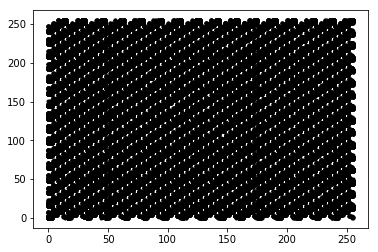

In [17]:
print(x[:100], y[:100])

plt.plot(x,y, 'k.')
plt.show()

In [5]:
import numpy as np

test = np.zeros([640,480])
test[dwP[0]] = 255
plt.imshow(test)
plt.show()

IndexError: too many indices for array

In [ ]:
print(dwP[0])

In [ ]:
print(timestamps[:100])

In [ ]:
xlim = [int(sys.argv[1]), int(sys.argv[2])]
ylim = [int(sys.argv[3]), int(sys.argv[4])]
print(xlim)
print(ylim)

sleep = int(sys.argv[5])

vidfile = './RawData/VT1.Nvt'


npzfile = np.load('./RawData/EPOCHS.npz')
start = npzfile['arr_0'].astype(int)
stop = npzfile['arr_1'].astype(int)


#data = videodata[10000:20000]

timestamps, xpt, ypt, dwP, dnT = getVideodata(videodata)
img=np.zeros([640, 480], dtype=np.uint8)


print(start)
print(stop)

if sleep == 1:
  timestamps = list(timestamps[:start]) + list(timestamps[stop:])
  xpt = list(xpt[:start]) + list(xpt[stop:])
  ypt = list(ypt[:start]) + list(ypt[stop:])
  dwP = list(dwP[:start]) + list(dwP[stop:])
  dnT = list(dnT[:start]) + list(dnT[stop:])
else:
  timestamps = list(timestamps[start:stop])
  xpt = list(xpt[start:stop])
  ypt = list(ypt[start:stop])
  dwP = list(dwP[start:stop])
  dnT = list(dnT[start:stop])


outfile = './RawData/dnTout.ascii'
f = open(outfile, "w")

for ii,targets in enumerate(dnT):
  for t in targets:
    line = format(t,'032b')
    pure = line[0:4]
    y = int(line[4:16], 2)   
    raw = line[16:20]
    x = int(line[20:], 2)
      
    outstr=str(timestamps[ii]) + ' ' \
         + str(raw[0]) + ' ' + str(raw[1]) + ' ' + str(raw[2]) + ' ' + str(raw[3]) + ' ' \
         + str(pure[1]) + ' ' + str(pure[2]) + ' ' + str(pure[3]) + ' ' \
         + str(x) + ' ' + str(y) + '\n'
    if (ylim[0] < y < ylim[1]) and (xlim[0] < x < xlim[1]):
      f.write(outstr)
      img[x,y] += 1
      #print(outstr)
plt.subplot(2,2,1)
plt.plot(ypt,xpt,'b.')

plt.subplot(2,2,2)
plt.imshow(img)
#plt.show()

f.close()

outfile = './RawData/dwPout.ascii'

f = open(outfile, "w")

img=np.zeros([640, 480], dtype=np.uint8)
for ii,p in enumerate(dwP):
  for pt in p:
    line = format(pt,'032b')
    pure = line[0:4]
  
    y = int(line[4:16], 2)
    raw = line[16:20]
    x = int(line[20:], 2)
    
    outstr=str(timestamps[ii]) + ' ' \
         + str(raw[0]) + ' ' + str(raw[1]) + ' ' + str(raw[2]) + ' ' + str(raw[3]) + ' ' \
         + str(pure[1]) + ' ' + str(pure[2]) + ' ' + str(pure[3]) + ' ' \
         + str(x) + ' ' + str(y) + '\n'
 
    if (ylim[0] < y < ylim[1]) and (xlim[0] < x < xlim[1]):
      f.write(outstr)
      img[x,y] += 1
      #print(outstr)

plt.subplot(2,2,3)
 
plt.imshow(img)
plt.show()

f.close()


"""lopt
Information about file formats for Cheetah video

UInt16 swstx Value indicating the beginning of a record. Always 0x800 (2048).
UInt16 swid ID for the originating system of this record.
UInt16 swdata_size Size of a VideoRec in bytes.
UInt64 qwTimeStamp Cheetah timestamp for this record. This value is in microseconds.
14 + 1600 2 4 4 4 200
UInt32[] dwPoints Points with the color bitfield values for this record. This is a 400
element array. See Video Tracker Bitfield Information below.

Int16 sncrc Unused*

Int32 dnextracted_x Extracted X location of the target being tracked.
Int32 dnextracted_y Extracted Y location of the target being tracked.
Int32 dnextracted_angle The calculated head angle in degrees clockwise from the positive Y
axis. Zero will be assigned if angle tracking is disabled.**

Int32[] dntargets Colored targets using the samebitfield format used by the dwPoints
array. Instead of transitions, the bitfield indicates the colors that make
up each particular target and the center point of that target. This is a
50 element array sorted by size from largest (index 0) to smallest
(index 49). A target value of 0 means that no target is present in that
index location. See Video Tracker Bitfield Information below.

Video Tracker Bitfield Information:
The pixel data consists of four hundred 32 bit values (one 32 bit value per pixel). The target data
consists of fifty 32 bit values. These data have the same bit-field format which means that the 32 bit
value is broken up into sub data to describe the X location (pixel number in the line), Y location (line
number  of the frame) and the tracker colors which were above and below threshold.

The X and Y values are allocated 12 bits each, but their maximum value is determined by the resolution
that is used when tracking. See the header of your file for information about the resolution used when
your file was recorded. The other bits indicate which of the color values were above (1) or below (0)
their respective threshold setting. The layout of these bit fields can be visualized by the following:
"""
 
    
    

In [ ]:
ts, x, y,_,_ = getVideoData('./RawData/VT1.Nvt')

print("finishied...")

In [ ]:
print(x[:100], y[:100])

In [ ]:
from matplotlib import pyplot as plt


plt.plot(x,y, 'k.')
plt.show()